# ***DSP - Signals and DTFT & DFT***

##**Function that creates Complex Exponential**

In [ ]:
def ct_complex_exponential(freq,
                           start_time = 0,
                           stop_time = 10,
                           plot = 1,
                           values  = 1):
    '''
    Creates a continous time complex exponentional....though continous time here assumes 1000 time points per period of the signal.

    Arguments:

            freq            : (list) list of all frequencies of the signal to be created
                                eg)  [3400]  --> creates a complex exponential of frequency 3400 Hz
                                     [3400,2300] --> creates a complex exponential of 3400 Hz and 2300 Hz and adds them

            start_time      : (int/float) starting time of the signal

            stop_time       : (int/float) The stop time of the signal

            plot            : (bool) If True displays the signal plots - magnitude,phase,real and imaginary spectrums

            values          : (bool) If True displays the signal values at the time points ,their magnitude,phase,real and imaginary spectrum values

                                     returns a DICTIONARY containing these values (NB: returns only if values = True)

                                        keys :  "signal_values"
                                                "magnitude_spectrum"
                                                "phase_spectrum"
                                                "real_spectrum"
                                                "imaginary_spectrum"



    '''

    import numpy as np
    import matplotlib.pyplot as plt

    freq = np.array(freq)
    omega = 2*np.pi*freq
    freq = list(freq)
    omega = list(omega)

    t = np.arange(start_time,stop_time,10**-5)


    if type(omega) is list:
        omega = np.array(omega)
        sig = np.zeros(np.shape(t),dtype = np.cdouble)
        for i in omega:
            sig += np.exp(1j*i*t)
    else:
        raise Exception(f'Type of omega should be a list but recieved <{type(omega)}>')

    if plot == True:

        fig = plt.figure(figsize=(10,7))
        fig.suptitle(f'Signal Plots')

        ax1 = fig.add_subplot(2,2,1)
        ax1.plot(t,np.absolute(sig))
        ax1.set_title("Magnitude Spectrum")
        ax1.set_xlabel("time")
        ax1.set_ylabel("Magnitude")

        ax2 = fig.add_subplot(2,2,2)
        ax2.plot(t,np.angle(sig))
        ax2.set_title("Phase Spectrum")
        ax2.set_xlabel("time")
        ax2.set_ylabel("Phase")

        ax3 = fig.add_subplot(2,2,3)
        ax3.plot(t,np.real(sig))
        ax3.set_title("Real Spectrum")
        ax3.set_xlabel("time")
        ax3.set_ylabel("Real Part")

        ax4 = fig.add_subplot(2,2,4)
        ax4.plot(t,np.imag(sig))
        ax4.set_title("Imaginary Spectrum")
        ax4.set_xlabel("time")
        ax4.set_ylabel("Imaginary Part")


        plt.subplots_adjust(left=0.1,   # Adjust the left margin
                            right=0.9,  # Adjust the right margin
                            bottom=0.1, # Adjust the bottom margin
                            top=0.9,    # Adjust the top margin
                            wspace=0.3, # Adjust the horizontal spacing between subplots
                            hspace=0.5)  # Adjust the vertical spacing between subplots

        plt.show()

    if values == True:

        val = {"signal_values": sig,
               "magnitude_spectrum": np.absolute(sig),
               "phase_spectrum":np.angle(sig),
               "real_spectrum":np.real(sig),
               "imaginary_spectrum":np.imag(sig)}

        return val




##**Function that samples any signal and plots it**

In [ ]:
def sampling_signal_time_domain(sig,
                             sampling_interval = 10,
                             sample_no = 16,
                             plot = 1,
                             values = 0):

    '''
    Samples any time domain signal and plots them

    Arguments:

            sig                 : (ndarray) The array of signals to be sampled.

            sampling_interval   : (int) The interval at which samples from sig  is to be taken. i.e) if sampling_interval is 'n', every nth sample
                                         from sig will be taken.

            sample_no           : (int) If sample_no is set to 'm', only the first m samples from the sampled signal will be considered for plotting
                                        and returning

            plot            : (bool) If True displays the signal plots - magnitude,phase,real and imaginary spectrums

            values          : (bool) If True displays the signal values at the time points ,their magnitude,phase,real and imaginary spectrum values

                                     returns a DICTIONARY containing these values (NB: returns only if values = True)

                                        keys :  "sampled_signal_values"
                                                "magnitude_spectrum"
                                                "phase_spectrum"
                                                "real_spectrum"
                                                "imaginary_spectrum"

    '''


    import numpy as np
    import matplotlib.pyplot as plt
    #sig = np.array(sig)

    sam_sig = [sig[i] for i in range(0,len(sig),sampling_interval)]

    n = np.arange(sample_no)

    if plot == True:

        fig = plt.figure(figsize=(10,7))
        fig.suptitle(f'Sampled Signal Plots')

        ax1 = fig.add_subplot(2,2,1)
        ax1.stem(n,np.absolute(sam_sig[:sample_no]))
        ax1.set_title("Magnitude Spectrum")
        ax1.set_xlabel("n")
        ax1.set_ylabel("Magnitude")

        ax2 = fig.add_subplot(2,2,2)
        ax2.stem(n,np.angle(sam_sig[:sample_no]))
        ax2.set_title("Phase Spectrum")
        ax2.set_xlabel("n")
        ax2.set_ylabel("Phase")

        ax3 = fig.add_subplot(2,2,3)
        ax3.stem(n,np.real(sam_sig[:sample_no]))
        ax3.set_title("Real Spectrum")
        ax3.set_xlabel("n")
        ax3.set_ylabel("Real Part")

        ax4 = fig.add_subplot(2,2,4)
        ax4.stem(n,np.imag(sam_sig[:sample_no]))
        ax4.set_title("Imaginary Spectrum")
        ax4.set_xlabel("n")
        ax4.set_ylabel("Imaginary Part")


        plt.subplots_adjust(left=0.1,   # Adjust the left margin
                            right=0.9,  # Adjust the right margin
                            bottom=0.1, # Adjust the bottom margin
                            top=0.9,    # Adjust the top margin
                            wspace=0.3, # Adjust the horizontal spacing between subplots
                            hspace=0.5)  # Adjust the vertical spacing between subplots

        plt.show()

    elif plot != False:
        raise ValueError(f'plot should be of type bool....expected <bool> but recieved <{type(plot)}>')



    if values == True:

        val = {"sampled_signal_values": np.array(sam_sig[:sample_no]),
               "magnitude_spectrum":np.array(np.absolute(sam_sig[:sample_no])),
               "phase_spectrum":np.array(np.angle(sam_sig[:sample_no])),
               "real_spectrum":np.array(np.real(sam_sig[:sample_no])),
               "imaginary_spectrum":np.array(np.imag(sam_sig[:sample_no]))}

        return val

    elif values != False:
        raise ValueError(f'values should be of type bool....expected <bool> but recieved <{type(values)}>')




##**Function that finds and plots DTFT of any signal**

In [ ]:
def dtft(sam_sig,
         start_omg,
         stop_omg,
         plot = 1,
         values = 0):


    '''
        Creates a continous time complex exponentional....though continous time here assumes 1000 time points per period of the signal.

        Arguments:

                sam_sig         : (ndarray)  The array of sampled signals whoose dtft is to be found

                start_omg       : (int/float) starting frequency of dtft to be plotted and returned

                stop_omg        : (int/float) stopping frequency of dtft to be plotted and returned

                plot            : (bool) If True displays the signal plots - magnitude,phase,real and imaginary spectrums

                values          : (bool) If True displays the signal values at the time points ,their magnitude,phase,real and imaginary spectrum values

                                        returns a DICTIONARY containing these values (NB: returns only if values = True)

                                            keys :  "DTFT_of_signal"
                                                    "magnitude_spectrum"
                                                    "phase_spectrum"
                                                    "real_spectrum"
                                                    "imaginary_spectrum"

        '''

    import numpy as np
    import matplotlib.pyplot as plt

    omg = np.arange(start_omg,stop_omg,10**-5)

    sample_no = len(sam_sig)
    n = np.arange(0,sample_no)

    dtft = []
    for p in omg:
        mat = 0
        for q in n:
            mat += sam_sig[q] * np.exp(-1j*p*q)
        dtft.append(mat)

    if plot == True:

        fig = plt.figure(figsize=(10,7))
        fig.suptitle(f'DTFT of the Signal')

        ax1 = fig.add_subplot(2,2,1)
        ax1.plot(omg,np.absolute(dtft))
        ax1.set_title("Magnitude Spectrum")
        ax1.set_xlabel("w")
        ax1.set_ylabel("Magnitude")

        ax2 = fig.add_subplot(2,2,2)
        ax2.plot(omg,np.angle(dtft))
        ax2.set_title("Phase Spectrum")
        ax2.set_xlabel("w")
        ax2.set_ylabel("Phase")

        ax3 = fig.add_subplot(2,2,3)
        ax3.plot(omg,np.real(dtft))
        ax3.set_title("Real Spectrum")
        ax3.set_xlabel("w")
        ax3.set_ylabel("Real Part")

        ax4 = fig.add_subplot(2,2,4)
        ax4.plot(omg,np.imag(dtft))
        ax4.set_title("Imaginary Spectrum")
        ax4.set_xlabel("w")
        ax4.set_ylabel("Imaginary Part")


        plt.subplots_adjust(left=0.1,   # Adjust the left margin
                            right=0.9,  # Adjust the right margin
                            bottom=0.1, # Adjust the bottom margin
                            top=0.9,    # Adjust the top margin
                            wspace=0.3, # Adjust the horizontal spacing between subplots
                            hspace=0.5)  # Adjust the vertical spacing between subplots

        plt.show()

    elif plot != False:
        raise ValueError(f'plot should be of type bool....expected <bool> but recieved <{type(plot)}>')


    if values == True:

        val = {"DTFT_of_signal":np.array(dtft),
               "magnitude_spectrum":np.array(np.absolute(dtft)),
               "phase_spectrum":np.array(np.angle(dtft)),
               "real_spectrum":np.array(np.real(dtft)),
               "imaginary_spectrum":np.array(np.imag(dtft))}

        return val

    elif values != False:
        raise ValueError(f'values should be of type bool....expected <bool> but recieved <{type(values)}>')


##**Function that finds and plots DFT of any signal**

In [ ]:
def dft(sam_sig,
        plot = 1,
        values = 1):


    '''
        Returns and plots the DFT of a discrete signal.

        Arguments:

                sam_sig         : (ndarray)  The array of sampled signals whoose dft is to be found

                plot            : (bool) If True displays the signal plots - magnitude,phase,real and imaginary spectrums

                values          : (bool) If True displays the signal values at the time points ,their magnitude,phase,real and imaginary spectrum values

                                        returns a DICTIONARY containing these values (NB: returns only if values = True)

                                            keys :  "DFT_of_signal"
                                                    "magnitude_spectrum"
                                                    "phase_spectrum"
                                                    "real_spectrum"
                                                    "imaginary_spectrum"

    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import fft

    dft = fft.fft(sam_sig,axis = 0)

    k = np.arange(0,len(dft))

    if plot == True:

        fig = plt.figure(figsize=(10,7))
        fig.suptitle(f'DFT of Signal x[n]')

        ax1 = fig.add_subplot(2,2,1)
        ax1.stem(k,np.absolute(dft))
        ax1.set_title("Magnitude Spectrum")
        ax1.set_xlabel("k")
        ax1.set_ylabel("Magnitude")

        ax2 = fig.add_subplot(2,2,2)
        ax2.stem(k,np.angle(dft))
        ax2.set_title("Phase Spectrum")
        ax2.set_xlabel("k")
        ax2.set_ylabel("Phase")

        ax3 = fig.add_subplot(2,2,3)
        ax3.stem(k,np.real(dft))
        ax3.set_title("Real Spectrum")
        ax3.set_xlabel("k")
        ax3.set_ylabel("Real Part")

        ax4 = fig.add_subplot(2,2,4)
        ax4.stem(k ,np.imag(dft))
        ax4.set_title("Imaginary Spectrum")
        ax4.set_xlabel("k")
        ax4.set_ylabel("Imaginary Part")


        plt.subplots_adjust(left=0.1,   # Adjust the left margin
                            right=0.9,  # Adjust the right margin
                            bottom=0.1, # Adjust the bottom margin
                            top=0.9,    # Adjust the top margin
                            wspace=0.3, # Adjust the horizontal spacing between subplots
                            hspace=0.5) # Adjust the vertical spacing between subplots

    if values == 1:

        val = {"DFT_of_signal": dft,
               "magnitude_spectrum": np.absolute(dft),
               "phase_spectrum":np.angle(dft),
               "real_spectrum":np.real(dft),
               "imaginary_spectrum":np.imag(dft)}
        return val

    elif values == 0:
        pass

    elif values != False:
        raise ValueError(f'values should be of type bool....expected <bool> but recieved <{type(values)}>')



##**MAIN**

### Set frequencies

In [ ]:
freq = [5900,5900*2,5900*0.5]
freq

[5900, 11800, 2950.0]

### Plot the signals - Magnitude , Phase , Real and Imaginary Spectrums



*   Signal
*   Sampled Signal
*   DTFT of the Signal
*   DFT of the Signal



### Signal

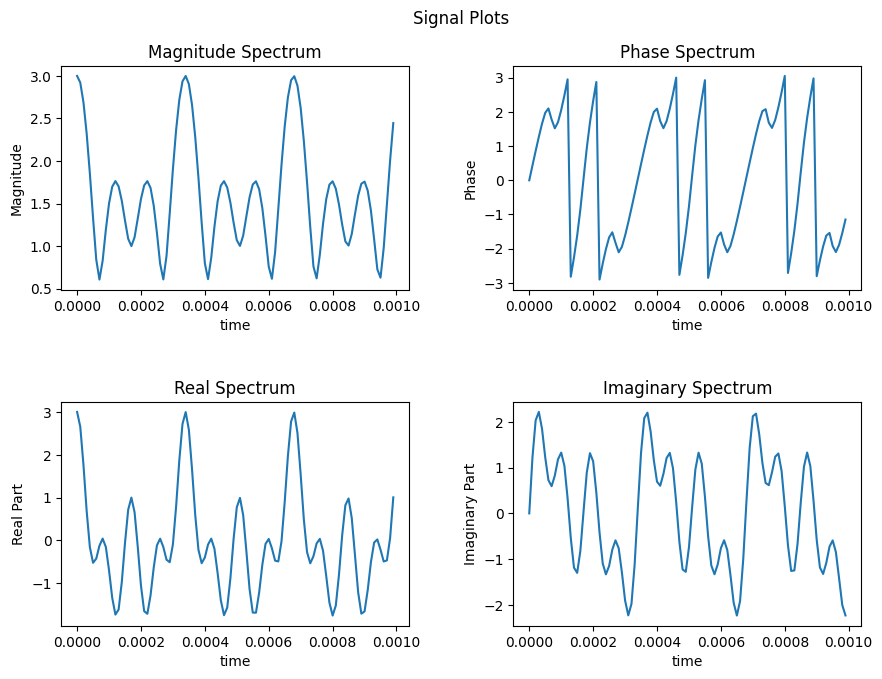

Signal_values: 
[ 3.+0.j  3.+1.j  2.+2.j  1.+2.j -0.+2.j -1.+1.j -0.+1.j -0.+1.j  0.+1.j
 -0.+1.j -1.+1.j -1.+1.j -2.+0.j -2.-1.j -1.-1.j -0.-1.j  1.-1.j  1.+0.j
  1.+1.j -0.+1.j -1.+1.j -2.+0.j -2.-0.j -1.-1.j -1.-1.j -0.-1.j  0.-1.j
 -0.-1.j -0.-1.j -1.-1.j -0.-2.j  1.-2.j  2.-2.j  3.-1.j  3.+0.j  3.+1.j
  2.+2.j  1.+2.j -0.+2.j -1.+1.j -0.+1.j -0.+1.j  0.+1.j -0.+1.j -1.+1.j
 -1.+1.j -2.+0.j -2.-1.j -1.-1.j  0.-1.j  1.-1.j  1.+0.j  1.+1.j -0.+1.j
 -1.+1.j -2.+0.j -2.-1.j -1.-1.j -1.-1.j -0.-1.j  0.-1.j -0.-1.j -0.-1.j
 -0.-1.j -0.-2.j  1.-2.j  2.-2.j  3.-1.j  3.+0.j  3.+1.j  2.+2.j  0.+2.j
 -0.+2.j -1.+1.j -0.+1.j -0.+1.j  0.+1.j -0.+1.j -1.+1.j -1.+1.j -2.+0.j
 -2.-1.j -1.-1.j  0.-1.j  1.-1.j  1.+0.j  1.+1.j -0.+1.j -1.+1.j -2.+0.j
 -2.-1.j -1.-1.j -1.-1.j -0.-1.j  0.-1.j -0.-1.j -0.-1.j -0.-1.j  0.-2.j
  1.-2.j]

Magnitude_Spectrum: 
[3. 3. 3. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 1. 1. 1. 1. 1. 1. 2. 2. 3. 3. 3. 3. 3. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2.

In [ ]:
sig =  ct_complex_exponential(freq,
                             plot = 1,
                             values = 1,
                             start_time = 0,
                             stop_time = 0.001)

print(f'Signal_values: \n{sig["signal_values"].round()}\n')
print(f'Magnitude_Spectrum: \n{sig["magnitude_spectrum"].round()}\n')
print(f'Phase_Spectrum: \n{sig["phase_spectrum"].round(1)}\n')
print(f'Real_Spectrum: \n{sig["real_spectrum"].round()}\n')
print(f'Imaginary_Spectrum: \n{sig["imaginary_spectrum"].round()}\n\n\n\n\n')


### Sampled Signal Values

### **Selection of Sampling Rate**

---



Frequencies = 2950 Hz, 5900 Hz and 11800 Hz

f max = 11800


---



By Sampling Therom,    

         f nq = 2 x f max  and fs >= f nq


---


        ----> fs  = 23600 Hz  = 23600



 So, Select fs = 24000 Hz  = 24 kHz


---

---> Sampling has to be done every 41.6 us

As coded above even though time is continous,the limitations of systems to store analog signals has made the code limit with just 10 us between every sample point. Thus we have to get the signal value at every 4 points.

So select sampling_interval = 4



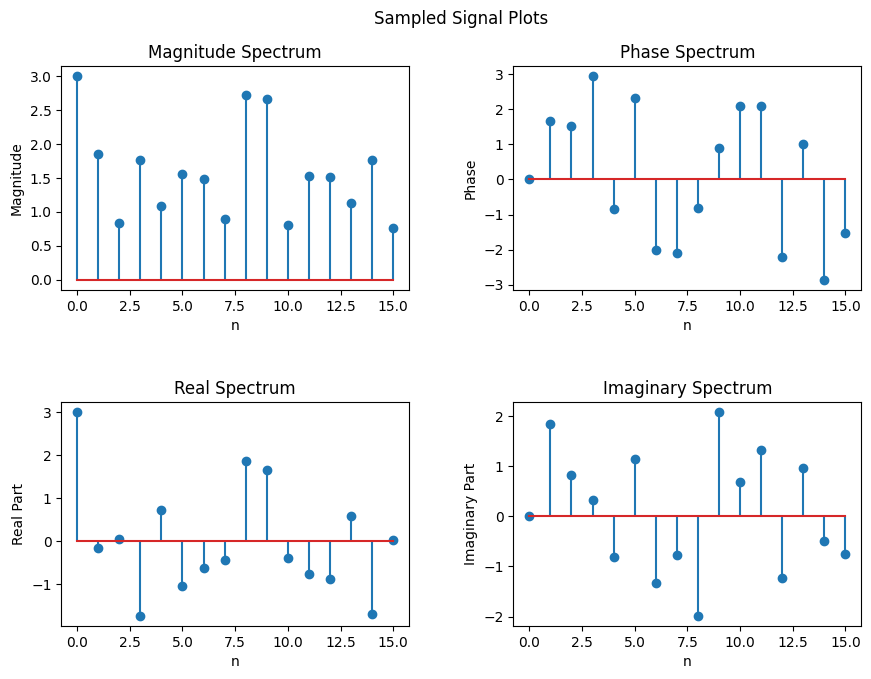

Sampled_Signal_values: 
[ 3.+0.j -0.+2.j  0.+1.j -2.+0.j  1.-1.j -1.+1.j -1.-1.j -0.-1.j  2.-2.j
  2.+2.j -0.+1.j -1.+1.j -1.-1.j  1.+1.j -2.-1.j  0.-1.j]

Magnitude_Spectrum: 
[3. 2. 1. 2. 1. 2. 1. 1. 3. 3. 1. 2. 2. 1. 2. 1.]

Phase_Spectrum: 
[ 0.  2.  2.  3. -1.  2. -2. -2. -1.  1.  2.  2. -2.  1. -3. -2.]

Real_Spectrum: 
[ 3. -0.  0. -2.  1. -1. -1. -0.  2.  2. -0. -1. -1.  1. -2.  0.]

Imaginary_Spectrum: 
[ 0.  2.  1.  0. -1.  1. -1. -1. -2.  2.  1.  1. -1.  1. -1. -1.]







In [ ]:
sam_sig = sampling_signal_time_domain(sig = sig["signal_values"],
                          sampling_interval = 4,
                          sample_no = 16,
                          plot = 1,
                          values = 1)

print(f'Sampled_Signal_values: \n{sam_sig["sampled_signal_values"].round()}\n')
print(f'Magnitude_Spectrum: \n{sam_sig["magnitude_spectrum"].round()}\n')
print(f'Phase_Spectrum: \n{sam_sig["phase_spectrum"].round()}\n')
print(f'Real_Spectrum: \n{sam_sig["real_spectrum"].round()}\n')
print(f'Imaginary_Spectrum: \n{sam_sig["imaginary_spectrum"].round()}\n\n\n\n\n')


### DTFT of the Signal

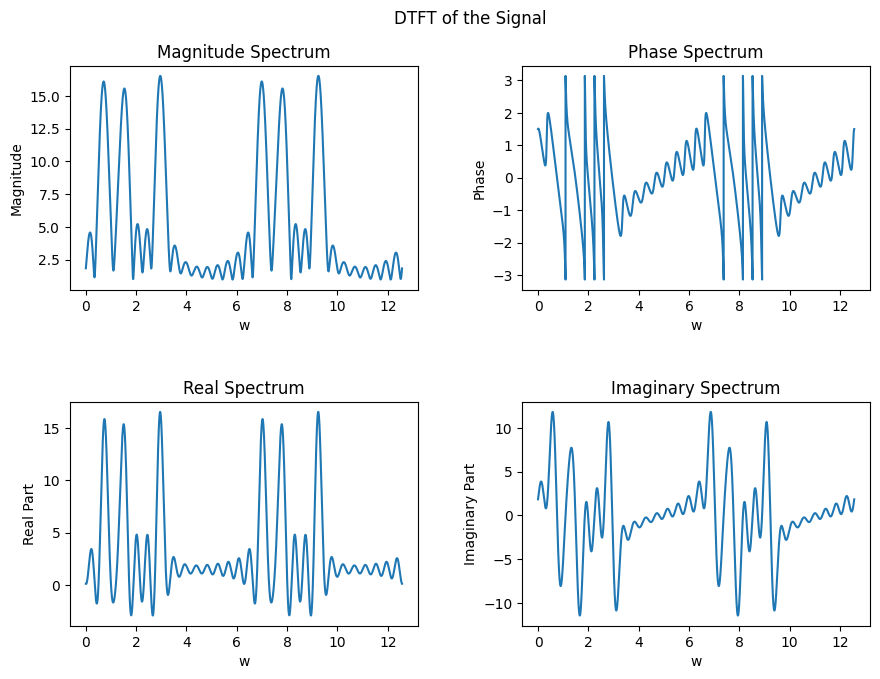

DTFT_Signal_values: 
[0.+2.j 0.+2.j 0.+2.j ... 0.+2.j 0.+2.j 0.+2.j]

Magnitude_Spectrum: 
[2. 2. 2. ... 2. 2. 2.]

Phase_Spectrum: 
[2. 2. 2. ... 2. 2. 2.]

Real_Spectrum: 
[0. 0. 0. ... 0. 0. 0.]

Imaginary_Spectrum: 
[2. 2. 2. ... 2. 2. 2.]







In [ ]:
dtft_sig = dtft(sam_sig["sampled_signal_values"],
            start_omg = 0,
            stop_omg = 3.1415*4,
            plot = 1,
            values = 1)

print(f'DTFT_Signal_values: \n{dtft_sig["DTFT_of_signal"].round()}\n')
print(f'Magnitude_Spectrum: \n{dtft_sig["magnitude_spectrum"].round()}\n')
print(f'Phase_Spectrum: \n{dtft_sig["phase_spectrum"].round()}\n')
print(f'Real_Spectrum: \n{dtft_sig["real_spectrum"].round()}\n')
print(f'Imaginary_Spectrum: \n{dtft_sig["imaginary_spectrum"].round()}\n\n\n\n\n')


### DFT of the signal

DFT_Signal_values: 
[ 0. +2.j -1. +3.j 15. -3.j -0. +4.j 13. -8.j  4. +1.j  2. +3.j  1. +9.j
  4.-10.j  2. -3.j  2. -1.j  2. -0.j  1. +0.j  1. +1.j  1. +1.j  1. +1.j]

Magnitude_Spectrums: 
[ 2.  3. 15.  4. 15.  4.  4.  9. 11.  4.  2.  2.  1.  1.  1.  2.]

Phase_Spectrum: 
[ 2.  2. -0.  2. -1.  0.  1.  1. -1. -1. -0. -0.  0.  0.  1.  1.]

Real_Spectrum: 
[ 0. -1. 15. -0. 13.  4.  2.  1.  4.  2.  2.  2.  1.  1.  1.  1.]

Imaginary_Spectrum: 
[  2.   3.  -3.   4.  -8.   1.   3.   9. -10.  -3.  -1.  -0.   0.   1.
   1.   1.]







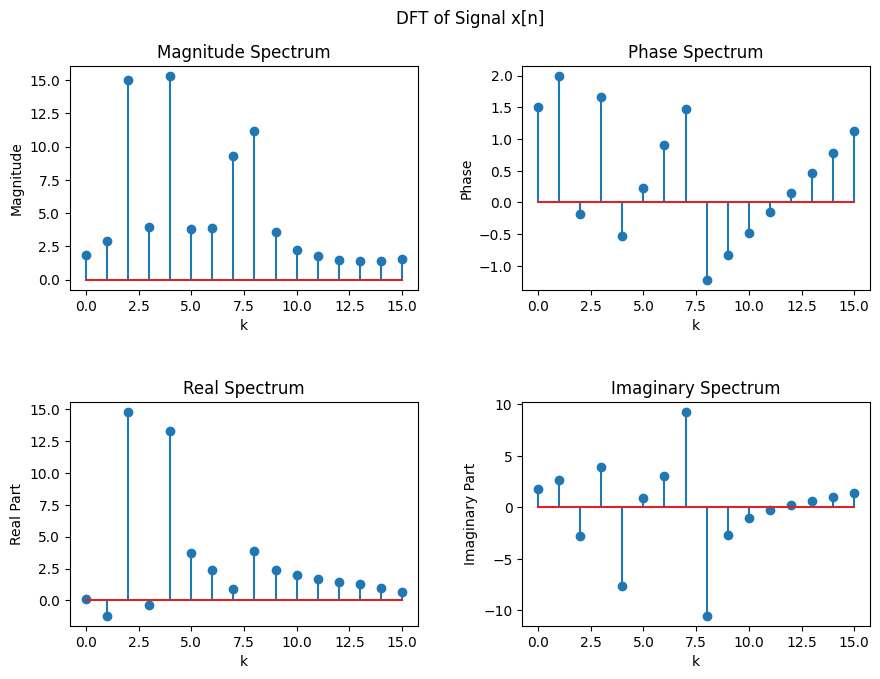

In [ ]:

dft_sig = dft(sam_sig["sampled_signal_values"],
          plot = 1,
          values  = 1)

print(f'DFT_Signal_values: \n{dft_sig["DFT_of_signal"].round()}\n')
print(f'Magnitude_Spectrums: \n{dft_sig["magnitude_spectrum"].round()}\n')
print(f'Phase_Spectrum: \n{dft_sig["phase_spectrum"].round()}\n')
print(f'Real_Spectrum: \n{dft_sig["real_spectrum"].round()}\n')
print(f'Imaginary_Spectrum: \n{dft_sig["imaginary_spectrum"].round()}\n\n\n\n\n')

##**Observations**

---


1.   Sampling the DTFT of a signal gives DFT of the signal.
2.   Even though signal is Discrete, DTFT of the signal is Continous and DFT is Discrete.
3.   The Continous time Complex Exponential is periodic for any values of 𝝎
4.   DTFT and DFT are 2π periodic.
5.   The signal has 3 frequencies say, (𝝎 , 2𝝎 and 4𝝎). Thus we see 3 high spikes corresponding to these frequencies ie., higher prescence of these frequencies
6.   Selecting sampling frequencies lesser han Nquist rate leads to complete mess of the signal and their tranforms in frequency domain.
7.   The real spectrum of DTFT and hence DFT is a even function.
8.   The imaginary spectrum of DTFT and hence DFT is an odd function.


---




